# Import

In [1]:
import numpy as np
import pandas as pd
from rdkit import Chem
from scipy import stats

import pathlib

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import rcParams
rcParams["font.size"] = 20

# Read Data

In [3]:
qm9 = pd.read_csv("qm_ext_plus.csv")
qm9.index = qm9["Unnamed: 0"]
qm9.drop(columns=["Unnamed: 0"], inplace=True)
qm9["mol"] = qm9["smiles"].apply(Chem.MolFromSmiles)

In [4]:
qm9.dropna()

,smiles,mu,alpha,homo,lumo,gap,zpve,cv,u0,u298,h298,g298,num_atoms,mol
Unnamed: 0,,,,,,,,,,,,,,
0,C,0.0000,13.210000,-0.387700,0.117100,0.504800,0.044749,6.469,-40.478930,-40.476062,-40.475117,-40.498597,1,<rdkit.Chem.rdchem.Mol object at 0x7f34e34925c0>
1,N,1.6256,9.460000,-0.257000,0.082900,0.339900,0.034358,6.316,-56.525887,-56.523026,-56.522082,-56.544961,1,<rdkit.Chem.rdchem.Mol object at 0x7f34e34926e0>
2,O,1.8511,6.310000,-0.292800,0.068700,0.361500,0.021375,6.002,-76.404702,-76.401867,-76.400922,-76.422349,1,<rdkit.Chem.rdchem.Mol object at 0x7f34e3492860>
3,C#C,0.0000,16.280000,-0.284500,0.050600,0.335100,0.026841,8.574,-77.308427,-77.305527,-77.304583,-77.327429,2,<rdkit.Chem.rdchem.Mol object at 0x7f34e34922c0>
4,C#N,2.8937,12.990000,-0.360400,0.019100,0.379600,0.016601,6.278,-93.411888,-93.409370,-93.408425,-93.431246,2,<rdkit.Chem.rdchem.Mol object at 0x7f34e3491f60>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155584,CCCCCC(Cl)(Cl)Cl,1.6998,91.438949,-0.437290,0.151861,0.589151,0.160407,39.627,-1612.899018,-1615.123029,-1612.726294,-1612.777780,9,<rdkit.Chem.rdchem.Mol object at 0x7f34e1a42860>
155585,CCCNCC(Cl)(Cl)Cl,1.0758,88.241518,-0.375428,0.153217,0.528645,0.149152,39.102,-1628.886186,-1631.151460,-1628.724865,-1628.775694,9,<rdkit.Chem.rdchem.Mol object at 0x7f34e1a428c0>
155586,CCCOCC(Cl)(Cl)Cl,5.6070,83.982178,-0.429966,0.153852,0.583818,0.136714,37.858,-1648.698216,-1651.009167,-1648.549519,-1648.600105,9,<rdkit.Chem.rdchem.Mol object at 0x7f34e1a42920>


In [5]:
db_conf = pd.read_parquet("db_conf.parquet")
db_conf.index = db_conf["db_idx"]
db_conf.drop(columns=["Unnamed: 0", "db_idx"], inplace=True)
db_conf["mol"] = db_conf["smiles"].apply(Chem.MolFromSmiles)
# db_conf.drop(columns=["CONF", "CONFCl", "CONFClBr", "CONFClBrI"], inplace=True)

In [6]:
na_ind = db_conf[db_conf.iloc[:,4:-1].isna().all(axis=1)].index

In [7]:
db_conf = db_conf.drop(index=na_ind)
db_conf = db_conf.reset_index(drop=True)

# Labels Encoding

In [8]:
from sklearn import preprocessing

In [9]:
le = preprocessing.LabelEncoder()
le.fit(["nB", "B"])
db_conf["class_encoded"] = le.transform(db_conf["Experimental BCF class"])

In [10]:
db_conf["class_encoded"] = db_conf["class_encoded"].replace({1:0, 0:1})

In [11]:
db_conf

,smiles,Experimental logarithmic BCF,Experimental BCF class,FQD_2,FQD_3,FQD_4,FQD_5,FQD_6,FQD_7,FQD_8,FQD_9,mol,class_encoded
0,CNc1cccc(C)c1,0.849,nB,[6],None,None,None,[213],"[929, 939]","[4340, 5388]",[32107],<rdkit.Chem.rdchem.Mol object at 0x7f34e1a6c6a0>,0
1,CC(COc1ccc(Oc2ccccc2)cc1)Oc1ccccn1,3.140,B,"[6, 7]","[12, 13, 14]","[21, 39, 40, 41]","[81, 84, 134, 136]","[213, 214, 277, 395, 548]","[948, 953, 1578]","[4590, 5397, 5402]","[31844, 33001, 33006]",<rdkit.Chem.rdchem.Mol object at 0x7f34e1a6c700>,1
2,CCCCCCCC/C=C\CCCCCCCCCCCCC,1.176,nB,[6],[12],[38],[132],[542],[2719],[14787],[123245],<rdkit.Chem.rdchem.Mol object at 0x7f34ded535e0>,0
3,Clc1ccccc1Cl,2.500,nB,None,None,None,None,[213],[134076],[135441],None,<rdkit.Chem.rdchem.Mol object at 0x7f34ded534c0>,0
4,Nc1cccc([N+](=O)[O-])c1,0.522,nB,None,None,None,None,[213],[939],[4360],[131914],<rdkit.Chem.rdchem.Mol object at 0x7f34ded53460>,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,CC1=C(C)S(=O)(=O)CCS1(=O)=O,0.633,nB,[6],None,None,None,"[133896, 133900]","[134043, 134044, 134066, 134068]","[135086, 135404, 135405]",[145115],<rdkit.Chem.rdchem.Mol object at 0x7f34ded3fb20>,0
835,FC(F)(F)c1ccc(Cl)c(Cl)c1,3.176,B,[6],None,None,None,[213],"[929, 134076]","[134378, 134382, 135441]",[137748],<rdkit.Chem.rdchem.Mol object at 0x7f34ded3fb80>,1
836,CN(C)[C@@H]1C(=O)C(C(=N)O)=C(O)[C@@]2(O)C(=O)C...,-0.222,nB,"[5, 6, 7]","[10, 12, 13]","[17, 20, 21, 34, 37, 38, 39, 41]","[54, 67, 68, 70, 71, 80, 81, 82, 83, 127, 131,...","[213, 224, 226, 228, 254, 258, 259, 260, 271, ...","[929, 948, 1092, 1094, 1099, 1104, 1119, 1129,...","[4341, 4957, 4959, 5378, 5407, 5809, 5841, 584...","[26263, 26273, 28867, 32083, 32170, 32193, 322...",<rdkit.Chem.rdchem.Mol object at 0x7f34ded3fbe0>,0
837,CC(C)N(C(=O)CCl)c1ccccc1,1.568,nB,"[5, 6]","[10, 11, 12]","[18, 35]","[69, 73, 128]","[213, 255, 262, 288, 386]","[939, 1121, 1626, 1677]","[5388, 7443]","[25503, 26283, 32992]",<rdkit.Chem.rdchem.Mol object at 0x7f34ded3fc40>,0


In [12]:
db_conf["mol"] = db_conf["smiles"].apply(Chem.MolFromSmiles)
db_conf["num_atoms"] = db_conf["mol"].apply(lambda x: x.GetNumAtoms())

# Calculate FQDs

In [13]:
db_conf_filled = db_conf.copy()

In [14]:
qprops = "mu,alpha,homo,lumo,gap,zpve,u0,u298,h298,g298,cv".split(",")

In [15]:
import statistics
def calculate_FQDs(indices, patterns_db, quantum_property):
    if isinstance(indices, int) and indices == 0:
        return np.NaN
    if indices is None:
        return np.NaN
    ret = []
    for i in indices:
        ret.append(patterns_db[quantum_property][i])
    return statistics.mean(ret)

def calculate_FQDs_quant(mol, indices, patterns_db, quantum_property):
    if isinstance(indices, int) and indices == 0:
        return np.NaN
    if indices is None:
        return np.NaN
    ret = []
    for i in indices:
        n_occurences = len(list(mol.GetSubstructMatch(patterns_db["mol"][i])))
        ret.append(patterns_db[quantum_property][i] * n_occurences)
    return statistics.mean(ret)

In [16]:
# for prop in qprops:
#     for num in range(2, 10):
#         db_conf_filled[f"FQD_{num}_{prop}"] = db_conf_filled[f"FQD_{num}"].apply(calculate_FQDs, patterns_db=qm9, quantum_property=prop)

In [17]:
# for prop in qprops:
#     for num in range(2, 10):
#         db_conf_filled[f"FQD_{num}_{prop}_per_atom"] = db_conf_filled[f"FQD_{num}_{prop}"] / db_conf_filled["num_atoms"]

# Quant FQDs

In [18]:
for prop in qprops:
    for num in range(2, 10):
        db_conf_filled[f"quant_FQD_{num}_{prop}"] = db_conf_filled["mol"].apply(lambda x: calculate_FQDs_quant(x,
                                                                          indices=db_conf_filled[db_conf_filled["mol"]==x][f"FQD_{num}"].iloc[0],
                                                                          patterns_db=qm9,
                                                                          quantum_property=prop)
                                                                         )

In [19]:
for prop in qprops:
    for num in range(2, 10):
        db_conf_filled[f"quant_FQD_{num}_{prop}_per_atom"] = db_conf_filled[f"quant_FQD_{num}_{prop}"] / db_conf_filled["num_atoms"]

In [20]:
import itertools
fqd_cols_qual = []
for num, prop in itertools.product(range(2,10), qprops):
    fqd_cols_qual.append(f"FQD_{num}_{prop}")
fqd_cols_qual_per_atom = [f"{x}_per_atom" for x in fqd_cols_qual]
quant_fqd_cols = [f"quant_{x}" for x in fqd_cols_qual]
quant_fqd_cols_per_atom = [f"quant_{x}" for x in fqd_cols_qual_per_atom]

In [21]:
db_conf_filled.columns[15:]

Index(['quant_FQD_3_mu', 'quant_FQD_4_mu', 'quant_FQD_5_mu', 'quant_FQD_6_mu',
       'quant_FQD_7_mu', 'quant_FQD_8_mu', 'quant_FQD_9_mu',
       'quant_FQD_2_alpha', 'quant_FQD_3_alpha', 'quant_FQD_4_alpha',
       ...
       'quant_FQD_8_g298_per_atom', 'quant_FQD_9_g298_per_atom',
       'quant_FQD_2_cv_per_atom', 'quant_FQD_3_cv_per_atom',
       'quant_FQD_4_cv_per_atom', 'quant_FQD_5_cv_per_atom',
       'quant_FQD_6_cv_per_atom', 'quant_FQD_7_cv_per_atom',
       'quant_FQD_8_cv_per_atom', 'quant_FQD_9_cv_per_atom'],
      dtype='object', length=175)

In [22]:
cols = db_conf_filled.columns[15:]

# Fill with zeros

In [23]:
# x = db_conf_filled[cols].fillna(0)
# y = db_conf_filled["class_encoded"]

In [24]:
x = db_conf_filled[cols]
y = db_conf_filled["class_encoded"]

# OOB dataset creation

In [25]:
oob_idx = np.loadtxt("oob_idx").astype(int)
train_idx = np.loadtxt("train_idx").astype(int)

In [26]:
res_x, res_y = x.loc[list(train_idx.astype(int))], y.loc[list(train_idx.astype(int))]

In [27]:
oob_x, oob_y = x.loc[list(oob_idx)], y.loc[list(oob_idx)]

In [28]:
x, y = res_x, res_y

In [29]:
y.value_counts()

0    409
1    117
Name: class_encoded, dtype: int64

# Modelling

# Pipeline creation

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE, RandomOverSampler

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
import xgboost as xgb
import lightgbm as lgb

In [35]:
scor_dict = {"algorithm": [],
            "balanced_accuracy": [],
            "f1 score": []}

In [36]:
from sklearn.model_selection import StratifiedKFold

def my_score(model, n_folds, scoring_callable, X, Y):
    scores = [],[]
    cv = StratifiedKFold(n_folds)
    oversampler = RandomOverSampler(random_state=1)
    preprocessor = ColumnTransformer(
        [("prep", Pipeline([
            ("scaler", StandardScaler()),
            ("imputer", KNNImputer())
        ]),
                                     cols)], remainder="passthrough")

    for train_index, validation_index in cv.split(X, Y):
        x, y = X.iloc[train_index], Y.iloc[train_index]
        xx, yy = oversampler.fit_resample(x, y)
        xx = preprocessor.fit_transform(xx)
        model.fit(xx, yy)
        x_val = X.iloc[validation_index]
        x_val = preprocessor.transform(x_val)
        score_bac = scoring_callable[0](Y.iloc[validation_index], model.predict(x_val))
        score_f = scoring_callable[1](Y.iloc[validation_index], model.predict(x_val))
        
        print(f"bac: {score_bac}, f1: {score_f}")
        scores[0].append(score_bac)
        scores[1].append(score_f)
    
    return scores

### Baseline

In [37]:
scor_dict["algorithm"].extend(["Baseline"]*5)

In [38]:
dum = DummyClassifier(strategy="uniform", random_state=1)

In [39]:
scores = my_score(dum, 5, [balanced_accuracy_score, f1_score], x, y)

bac: 0.41565040650406504, f1: 0.2439024390243903
bac: 0.46604938271604934, f1: 0.2926829268292683
bac: 0.5082184517497349, f1: 0.32098765432098764
bac: 0.4247083775185578, f1: 0.24691358024691357
bac: 0.591728525980912, f1: 0.3950617283950617


In [40]:
scor_dict["balanced_accuracy"].extend(list(scores[0]))

In [41]:
scor_dict["f1 score"].extend(list(scores[1]))

### LogClf

In [42]:
scor_dict["algorithm"].extend(["Logistic Regression"]*5)

In [43]:
reg = LogisticRegression(max_iter=100000)

In [44]:
scores = my_score(reg, 5, [balanced_accuracy_score, f1_score], x, y)

bac: 0.7677845528455285, f1: 0.5937499999999999
bac: 0.853395061728395, f1: 0.6984126984126983
bac: 0.7163308589607635, f1: 0.5357142857142857
bac: 0.7502651113467657, f1: 0.5818181818181818
bac: 0.8215800636267232, f1: 0.6666666666666667


In [45]:
scor_dict["balanced_accuracy"].extend(list(scores[0]))

In [46]:
scor_dict["f1 score"].extend(list(scores[1]))

### Rand Forest

In [47]:
scor_dict["algorithm"].extend(["Random Forest"]*5)

In [48]:
clf = RandomForestClassifier(
            n_estimators=1000,
            max_features=0.3,
            random_state=1
)

In [49]:
scores = my_score(clf, 5, [balanced_accuracy_score, f1_score], x, y)

bac: 0.7809959349593496, f1: 0.6415094339622641
bac: 0.8194444444444444, f1: 0.7058823529411765
bac: 0.7963944856839873, f1: 0.6538461538461539
bac: 0.693796394485684, f1: 0.5217391304347826
bac: 0.6869034994697772, f1: 0.5263157894736841


In [50]:
scor_dict["balanced_accuracy"].extend(list(scores[0]))

In [51]:
scor_dict["f1 score"].extend(list(scores[1]))

### Grad Boosting

In [52]:
scor_dict["algorithm"].extend(["Gradient Boosting"]*5)

In [53]:
gbc = GradientBoostingClassifier(
            n_estimators=1000,
            max_features=0.3,
            random_state = 1,
)

In [54]:
scores = my_score(gbc, 5, [balanced_accuracy_score, f1_score], x, y)

bac: 0.8262195121951219, f1: 0.7199999999999999
bac: 0.8356481481481481, f1: 0.7727272727272727
bac: 0.7868504772004241, f1: 0.6530612244897959
bac: 0.7059915164369035, f1: 0.5454545454545454
bac: 0.6373276776246024, f1: 0.4324324324324324


In [55]:
scor_dict["balanced_accuracy"].extend(list(scores[0]))

In [56]:
scor_dict["f1 score"].extend(list(scores[1]))

### KNN

In [57]:
scor_dict["algorithm"].extend(["KNN"]*5)

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
knc = KNeighborsClassifier()

In [60]:
scores = my_score(knc, 5, [balanced_accuracy_score, f1_score], x, y)

bac: 0.709349593495935, f1: 0.5128205128205128
bac: 0.7662037037037037, f1: 0.5937499999999999
bac: 0.7171261930010604, f1: 0.523076923076923
bac: 0.8006362672322376, f1: 0.6153846153846153
bac: 0.7224284199363733, f1: 0.5454545454545454


In [61]:
scor_dict["balanced_accuracy"].extend(list(scores[0]))

In [62]:
scor_dict["f1 score"].extend(list(scores[1]))

### SVC

In [63]:
scor_dict["algorithm"].extend(["SVC"]*5)

In [64]:
from sklearn.svm import SVC

In [65]:
svc = SVC(kernel="poly", degree=4)

In [66]:
scores = my_score(svc, 5, [balanced_accuracy_score, f1_score], x, y)

bac: 0.7723577235772358, f1: 0.64
bac: 0.7800925925925926, f1: 0.6415094339622641
bac: 0.7433722163308589, f1: 0.5957446808510638
bac: 0.7902969247083775, f1: 0.6415094339622641
bac: 0.6876988335100742, f1: 0.5106382978723404


In [67]:
scor_dict["balanced_accuracy"].extend(list(scores[0]))

In [68]:
scor_dict["f1 score"].extend(list(scores[1]))

### XGBoost

In [69]:
scor_dict["algorithm"].extend(["XGBoost"]*5)

In [70]:
xgbc = xgb.XGBClassifier(n_estimators=1000, random_state=1)

In [71]:
scores = my_score(xgbc, 5, [balanced_accuracy_score, f1_score], x, y)

bac: 0.7515243902439024, f1: 0.6122448979591836
bac: 0.8233024691358024, f1: 0.7391304347826088
bac: 0.7807529162248144, f1: 0.6399999999999999
bac: 0.7025450689289502, f1: 0.55
bac: 0.718186638388123, f1: 0.5714285714285715


In [72]:
scor_dict["balanced_accuracy"].extend(list(scores[0]))

In [73]:
scor_dict["f1 score"].extend(list(scores[1]))

### Light GBM

In [74]:
scor_dict["algorithm"].extend(["Light GBM"]*5)

In [75]:
lgbc = lgb.LGBMClassifier(n_estimators=1000, random_state=1)

In [76]:
scores = my_score(lgbc, 5, [balanced_accuracy_score, f1_score], x, y)

bac: 0.7601626016260162, f1: 0.6153846153846153
bac: 0.8294753086419753, f1: 0.7555555555555556
bac: 0.7712089077412514, f1: 0.6382978723404256
bac: 0.7460233297985154, f1: 0.6190476190476191
bac: 0.7025450689289502, f1: 0.55


In [77]:
scor_dict["balanced_accuracy"].extend(list(scores[0]))

In [78]:
scor_dict["f1 score"].extend(list(scores[1]))

### Scores vis

In [79]:
scors = pd.DataFrame(scor_dict)
scors

,algorithm,balanced_accuracy,f1 score
0,Baseline,0.415650,0.243902
1,Baseline,0.466049,0.292683
2,Baseline,0.508218,0.320988
3,Baseline,0.424708,0.246914
4,Baseline,0.591729,0.395062
5,Logistic Regression,0.767785,0.593750
6,Logistic Regression,0.853395,0.698413
7,Logistic Regression,0.716331,0.535714
8,Logistic Regression,0.750265,0.581818
9,Logistic Regression,0.821580,0.666667


In [80]:
scors.to_csv("scors_knn_imp.csv")

In [81]:
scors.groupby(["algorithm"]).mean().to_csv("groupby_knn.csv")

In [82]:
scors.groupby(["algorithm"]).mean()

,balanced_accuracy,f1 score
algorithm,,
Baseline,0.481271,0.299910
Gradient Boosting,0.758407,0.624735
KNN,0.743149,0.558097
Light GBM,0.761883,0.635657
Logistic Regression,0.781871,0.615272
Random Forest,0.755507,0.609859
SVC,0.754764,0.605880
XGBoost,0.755262,0.622561


In [83]:
scors.groupby(["algorithm"]).median()

,balanced_accuracy,f1 score
algorithm,,
Baseline,0.466049,0.292683
Gradient Boosting,0.786850,0.653061
KNN,0.722428,0.545455
Light GBM,0.760163,0.619048
Logistic Regression,0.767785,0.593750
Random Forest,0.780996,0.641509
SVC,0.772358,0.640000
XGBoost,0.751524,0.612245


In [84]:
melted = scors.melt(id_vars="algorithm", var_name="metric")
melted

,algorithm,metric,value
0,Baseline,balanced_accuracy,0.415650
1,Baseline,balanced_accuracy,0.466049
2,Baseline,balanced_accuracy,0.508218
3,Baseline,balanced_accuracy,0.424708
4,Baseline,balanced_accuracy,0.591729
...,...,...,...
75,Light GBM,f1 score,0.615385
76,Light GBM,f1 score,0.755556
77,Light GBM,f1 score,0.638298
78,Light GBM,f1 score,0.619048


In [85]:
melted.groupby(by=["algorithm","metric"]).apply(lambda x: np.percentile(x, [75, 50, 25]).sum()/3)

algorithm            metric           
Baseline             balanced_accuracy    0.466325
                     f1 score             0.286861
Gradient Boosting    balanced_accuracy    0.773021
                     f1 score             0.639505
KNN                  balanced_accuracy    0.735253
                     f1 score             0.554094
Light GBM            balanced_accuracy    0.759132
                     f1 score             0.624243
Logistic Regression  balanced_accuracy    0.779877
                     f1 score             0.614078
Random Forest        balanced_accuracy    0.757062
                     f1 score             0.607224
SVC                  balanced_accuracy    0.765274
                     f1 score             0.625751
XGBoost              balanced_accuracy    0.750155
                     f1 score             0.607891
dtype: float64

In [88]:
iqr_mean = melted.groupby(by=["algorithm","metric"]).apply(lambda x: np.percentile(x, [75, 50, 25]).sum()/3)


KeyError: 'metric'

In [95]:
iqr_mean.loc[:,"f1 score"]

algorithm
Baseline               0.286861
Gradient Boosting      0.639505
KNN                    0.554094
Light GBM              0.624243
Logistic Regression    0.614078
Random Forest          0.607224
SVC                    0.625751
XGBoost                0.607891
dtype: float64

<AxesSubplot:xlabel='algorithm', ylabel='value'>

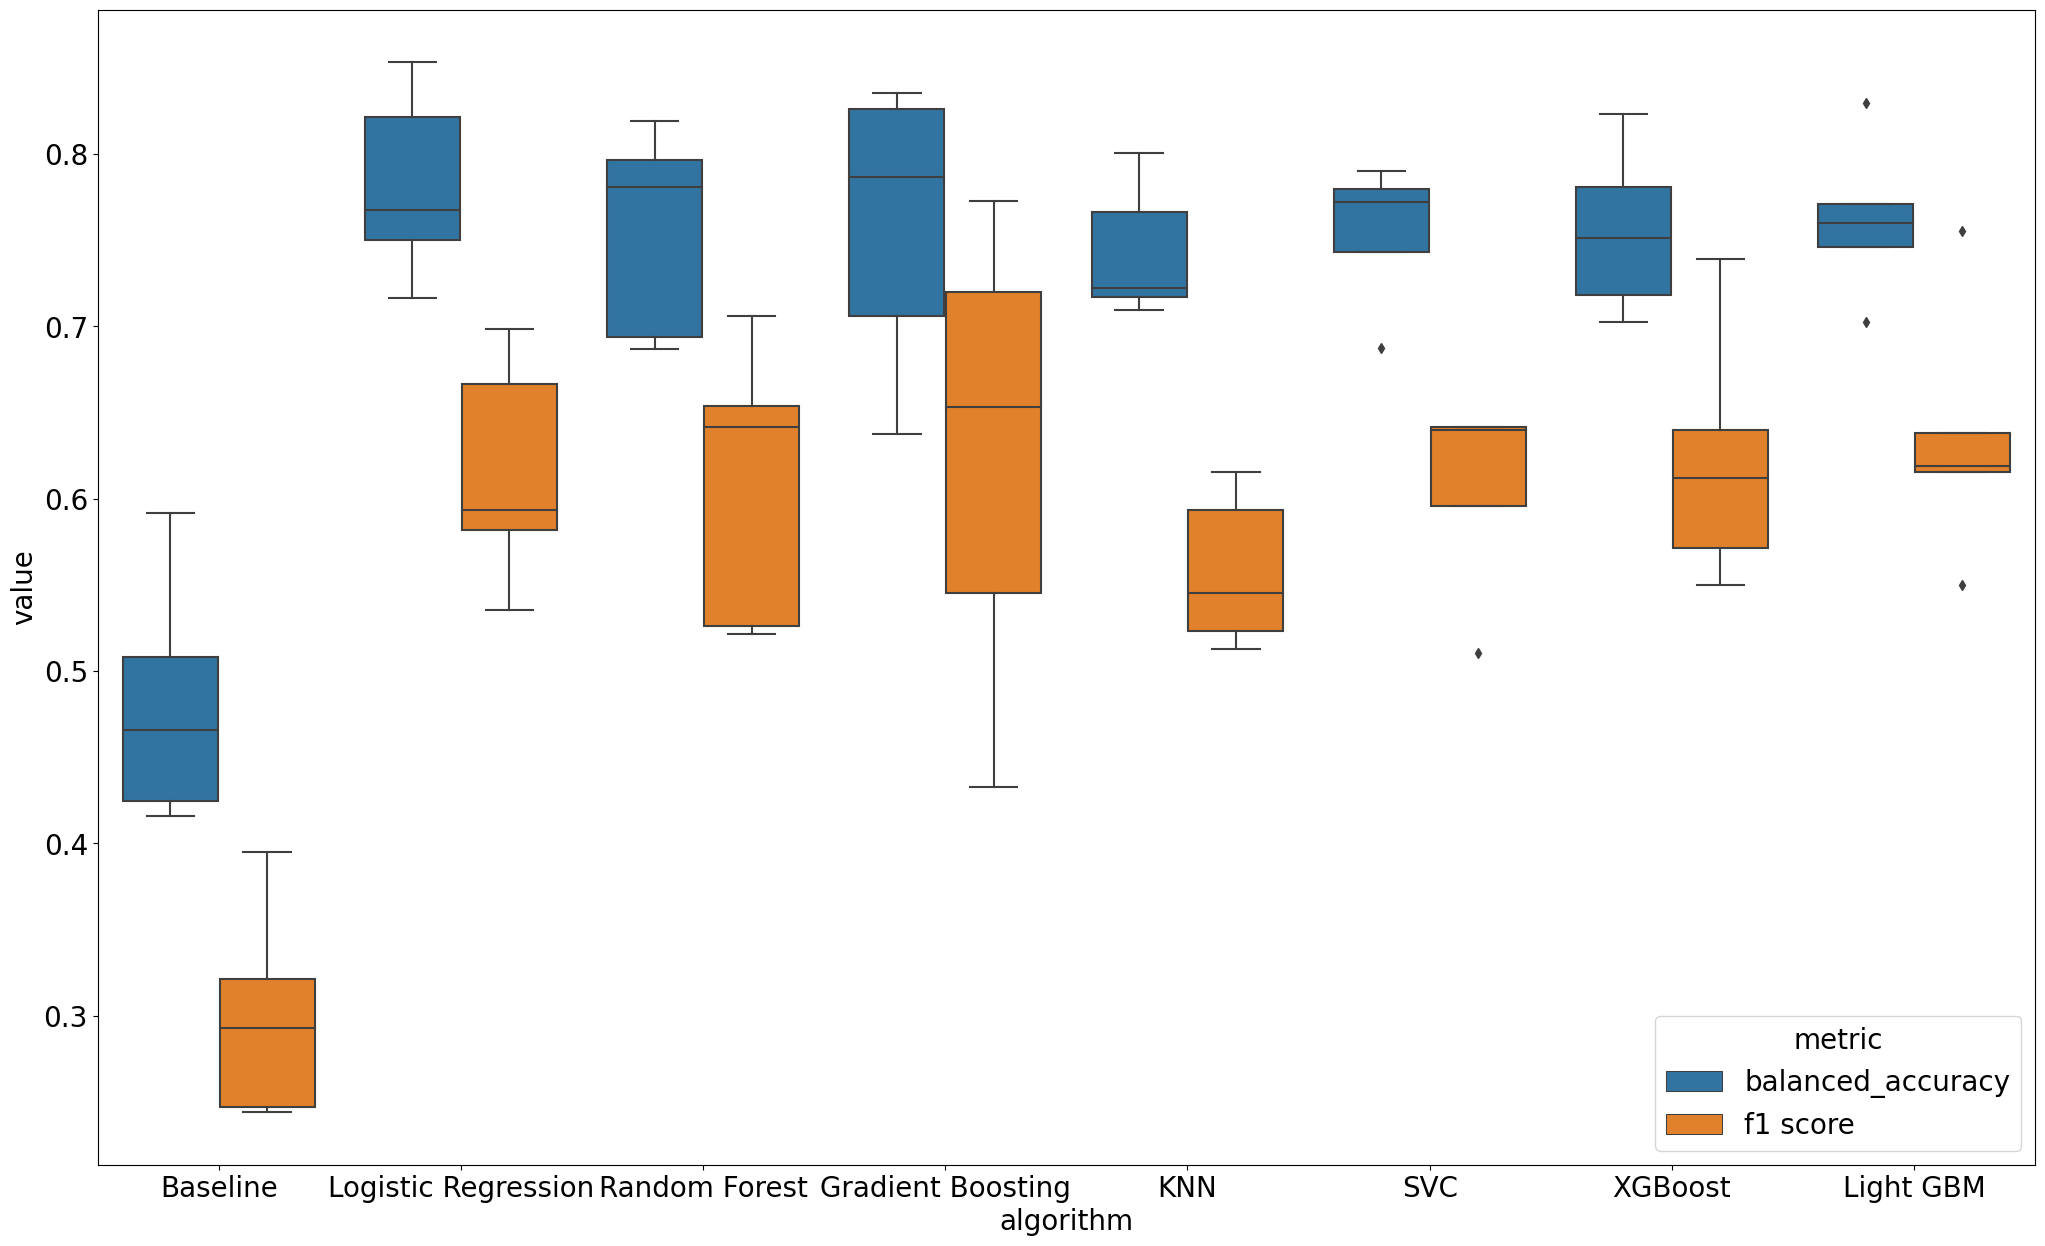

In [86]:
fig, ax = plt.subplots(figsize=(25,15))
sns.boxplot(x="algorithm", y="value", data=melted, hue="metric", ax=ax, meanline=True)

Text(0, 0.5, '')

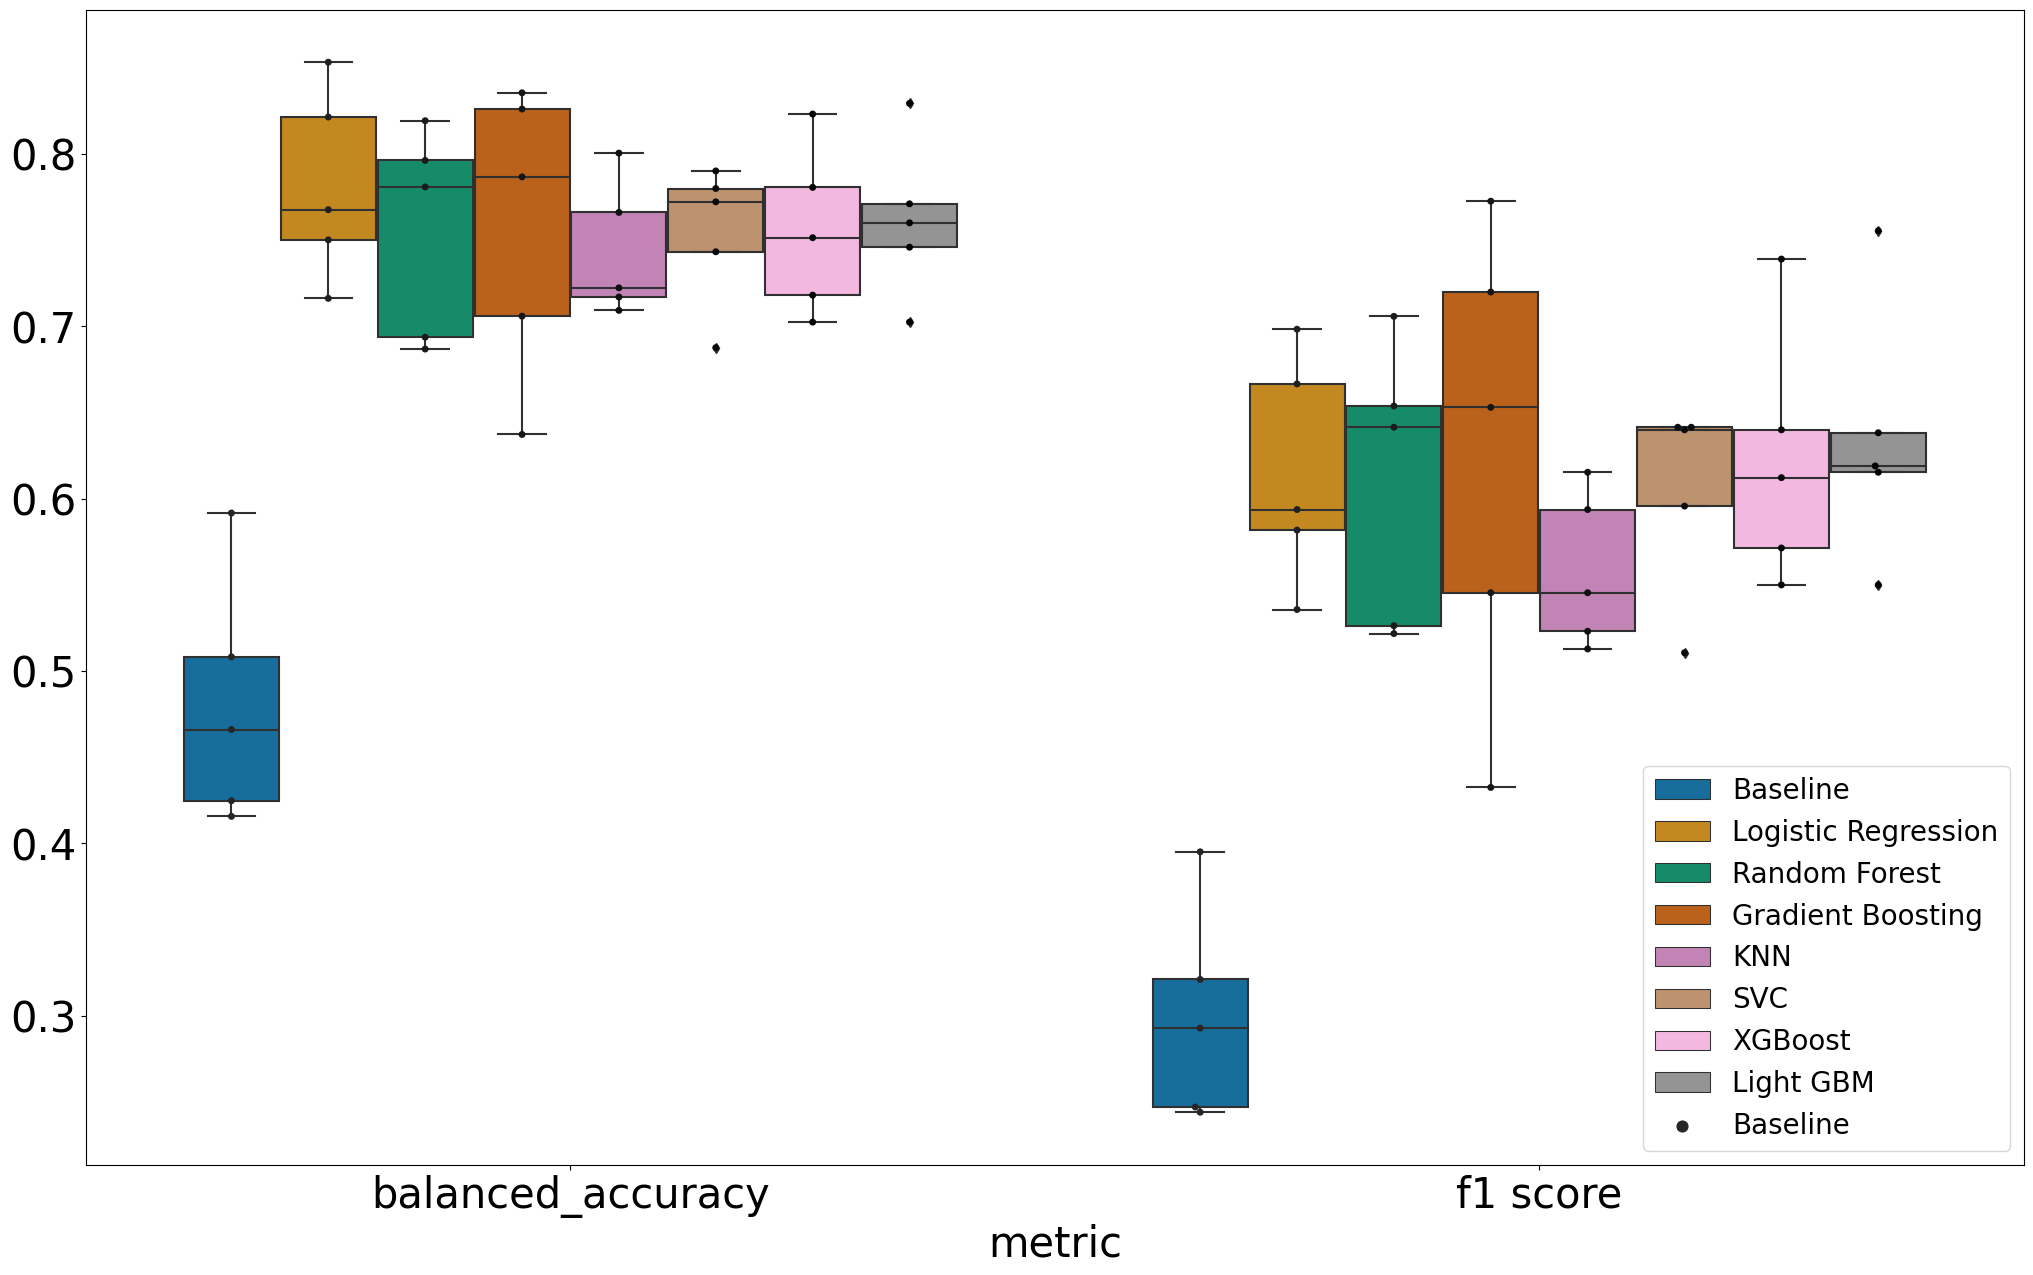

In [87]:
rcParams["font.size"] = 30
fig, ax = plt.subplots(figsize=(25,15))
sns.boxplot(x="metric", y="value", data=melted, hue="algorithm", ax=ax, palette="colorblind")
sns.swarmplot(x="metric", y="value", data=melted, hue="algorithm", ax=ax, dodge=True, color="k")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:9], labels[:9], fontsize=20)
ax.set_ylabel(None)

In [102]:
fig.savefig("cv_res_fqd.pdf")

# PCA features analysis

In [184]:
rcParams["font.size"] = 40

In [185]:
scaler = StandardScaler()
xx = scaler.fit_transform(xx)
oob_x = scaler.transform(oob_x)

In [186]:
imputer = KNNImputer()
xx = imputer.fit_transform(xx)
oob_x = imputer.transform(oob_x)

In [187]:
xx = pca.fit_transform(xx)
oob_x = pca.transform(oob_x)

In [188]:
loading_scores = pd.Series(pca.components_[0], index=x.columns)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
print(sorted_loading_scores[:40])

FQD_6_gap_per_atom            0.092775
quant_FQD_6_gap_per_atom      0.092775
FQD_9_cv_per_atom             0.092488
quant_FQD_9_cv_per_atom       0.092488
FQD_6_cv_per_atom             0.091903
quant_FQD_6_cv_per_atom       0.091903
FQD_7_gap_per_atom            0.091728
quant_FQD_7_gap_per_atom      0.091728
FQD_6_zpve_per_atom           0.090369
quant_FQD_6_zpve_per_atom     0.090369
FQD_7_cv_per_atom             0.090355
quant_FQD_7_cv_per_atom       0.090355
FQD_9_gap_per_atom            0.090074
quant_FQD_9_gap_per_atom      0.090074
quant_FQD_7_homo_per_atom     0.088869
FQD_7_homo_per_atom           0.088869
FQD_9_zpve_per_atom           0.088410
quant_FQD_9_zpve_per_atom     0.088410
quant_FQD_7_zpve_per_atom     0.088202
FQD_7_zpve_per_atom           0.088202
FQD_6_homo_per_atom           0.088183
quant_FQD_6_homo_per_atom     0.088183
quant_FQD_8_gap_per_atom      0.087948
FQD_8_gap_per_atom            0.087948
quant_FQD_8_cv_per_atom       0.087724
FQD_8_cv_per_atom        

In [189]:
loading_scores = pd.Series(pca.components_[1], index=x.columns)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
print(sorted_loading_scores[:40])

FQD_5_u298                   0.122745
quant_FQD_5_u298             0.122745
quant_FQD_5_h298             0.122745
FQD_5_h298                   0.122745
FQD_5_u0                     0.122744
quant_FQD_5_u0               0.122744
FQD_5_g298                   0.122744
quant_FQD_5_g298             0.122744
FQD_5_lumo                   0.106551
quant_FQD_5_lumo             0.106551
quant_FQD_5_zpve             0.105523
FQD_5_zpve                   0.105523
FQD_5_cv                     0.101937
quant_FQD_5_cv               0.101937
FQD_5_gap                    0.101803
quant_FQD_5_gap              0.101803
FQD_9_zpve                   0.086446
quant_FQD_9_zpve             0.086446
quant_FQD_9_u298_per_atom    0.083827
FQD_9_u298_per_atom          0.083827
quant_FQD_9_h298_per_atom    0.083827
FQD_9_h298_per_atom          0.083827
FQD_9_u0_per_atom            0.083827
quant_FQD_9_u0_per_atom      0.083827
FQD_9_g298_per_atom          0.083827
quant_FQD_9_g298_per_atom    0.083827
FQD_8_h298_p

In [190]:
loading_scores = pd.Series(pca.components_[2], index=x.columns)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
print(sorted_loading_scores[:40])

quant_FQD_5_u298     0.098735
FQD_5_u298           0.098735
quant_FQD_5_h298     0.098735
FQD_5_h298           0.098735
quant_FQD_5_u0       0.098734
FQD_5_u0             0.098734
quant_FQD_5_g298     0.098733
FQD_5_g298           0.098733
quant_FQD_3_alpha    0.095094
FQD_3_alpha          0.095094
quant_FQD_3_gap      0.093749
FQD_3_gap            0.093749
FQD_3_zpve           0.092832
quant_FQD_3_zpve     0.092832
FQD_2_gap            0.091408
quant_FQD_2_gap      0.091408
quant_FQD_4_alpha    0.089545
FQD_4_alpha          0.089545
quant_FQD_3_cv       0.089417
FQD_3_cv             0.089417
FQD_2_cv             0.089163
quant_FQD_2_cv       0.089163
quant_FQD_3_mu       0.089149
FQD_3_mu             0.089149
quant_FQD_2_zpve     0.088959
FQD_2_zpve           0.088959
quant_FQD_3_h298     0.088755
FQD_3_h298           0.088755
quant_FQD_3_u298     0.088755
FQD_3_u298           0.088755
FQD_3_u0             0.088754
quant_FQD_3_u0       0.088754
FQD_3_g298           0.088754
quant_FQD_

In [191]:
loading_scores = pd.Series(pca.components_[3], index=x.columns)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
print(sorted_loading_scores[:40])

quant_FQD_7_g298    0.141370
FQD_7_g298          0.141370
quant_FQD_7_u0      0.141369
FQD_7_u0            0.141369
quant_FQD_7_h298    0.141369
FQD_7_h298          0.141369
FQD_7_u298          0.141369
quant_FQD_7_u298    0.141369
quant_FQD_7_homo    0.124958
FQD_7_homo          0.124958
quant_FQD_8_homo    0.122804
FQD_8_homo          0.122804
quant_FQD_6_g298    0.119136
FQD_6_g298          0.119136
quant_FQD_6_u0      0.119135
FQD_6_u0            0.119135
FQD_6_u298          0.119135
quant_FQD_6_u298    0.119135
quant_FQD_6_h298    0.119135
FQD_6_h298          0.119135
FQD_8_g298          0.109532
quant_FQD_8_g298    0.109532
quant_FQD_8_u0      0.109531
FQD_8_u0            0.109531
quant_FQD_8_u298    0.109531
FQD_8_u298          0.109531
quant_FQD_8_h298    0.109531
FQD_8_h298          0.109531
FQD_6_homo          0.106720
quant_FQD_6_homo    0.106720
quant_FQD_7_gap     0.103125
FQD_7_gap           0.103125
FQD_6_gap           0.099056
quant_FQD_6_gap     0.099056
FQD_8_gap     

## Check which fragments are most important by atoms count

In [192]:
import itertools
from collections import Counter
keys = [f"PC{i}" for i in range(1,8)]
pc_dict = {k: None for k in keys}
pc_props_whole = []
for i in range(7):
    loading_scores = pd.Series(pca.components_[i], index=x.columns)
    sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
    splitted_names = itertools.chain.from_iterable([x.split("_") for x in sorted_loading_scores.index[:40]])
    PC_props = [x for x in splitted_names if x in [f"{j}" for j in range(1,10)]]
    pc_dict[f"PC{i+1}"] = Counter(PC_props)
    pc_props_whole += PC_props

pc_dict

{'PC1': Counter({'6': 10, '9': 10, '7': 10, '8': 8, '3': 2}),
 'PC2': Counter({'5': 18, '9': 12, '8': 10}),
 'PC3': Counter({'5': 8, '3': 18, '2': 6, '4': 8}),
 'PC4': Counter({'7': 12, '8': 12, '6': 12, '9': 4}),
 'PC5': Counter({'6': 20, '7': 8, '8': 2, '9': 2, '5': 8}),
 'PC6': Counter({'5': 20, '8': 8, '6': 10, '9': 2}),
 'PC7': Counter({'6': 4, '2': 10, '9': 6, '3': 2, '5': 14, '8': 2, '7': 2})}

In [193]:
Counter(pc_props_whole).most_common(5)

[('5', 68), ('6', 56), ('8', 42), ('9', 36), ('7', 32)]

## Check which fragments are most important by quantum feature

In [194]:
pc_dict2 = {k: None for k in keys}
pc_props_whole2 = []
for i in range(7):
    loading_scores = pd.Series(pca.components_[i], index=x.columns)
    sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
    splitted_names = itertools.chain.from_iterable([x.split("_") for x in sorted_loading_scores.index[:40]])
    PC_props = [x for x in splitted_names if x in qprops]
    pc_dict2[f"PC{i+1}"] = Counter(PC_props)
    pc_props_whole2 += PC_props


pc_dict2

{'PC1': Counter({'gap': 8, 'cv': 8, 'zpve': 10, 'homo': 8, 'alpha': 6}),
 'PC2': Counter({'u298': 6,
          'h298': 6,
          'u0': 6,
          'g298': 6,
          'lumo': 2,
          'zpve': 6,
          'cv': 4,
          'gap': 2,
          'homo': 2}),
 'PC3': Counter({'u298': 6,
          'h298': 6,
          'u0': 6,
          'g298': 4,
          'alpha': 4,
          'gap': 4,
          'zpve': 4,
          'cv': 4,
          'mu': 2}),
 'PC4': Counter({'g298': 8,
          'u0': 6,
          'h298': 6,
          'u298': 6,
          'homo': 8,
          'gap': 6}),
 'PC5': Counter({'alpha': 8,
          'h298': 6,
          'u298': 6,
          'u0': 6,
          'g298': 6,
          'mu': 4,
          'zpve': 4}),
 'PC6': Counter({'u298': 6,
          'h298': 6,
          'u0': 6,
          'g298': 6,
          'mu': 6,
          'zpve': 2,
          'homo': 2,
          'lumo': 4,
          'cv': 2}),
 'PC7': Counter({'mu': 12,
          'homo': 8,
          'g298':

In [195]:
Counter(pc_props_whole2).most_common(10)

[('u298', 32),
 ('h298', 32),
 ('u0', 32),
 ('g298', 32),
 ('zpve', 28),
 ('homo', 28),
 ('mu', 24),
 ('gap', 22),
 ('cv', 20),
 ('alpha', 20)]

In [196]:
xx.shape

(822, 14)

In [197]:
pca_df = pd.DataFrame(xx, columns=[f"PC{n}" for n in range(1, xx.shape[1]+1)])

In [198]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,3.301145,18.597217,-5.699404,7.300771,-3.068009,-3.896532,-3.870439,0.909340,-0.032121,0.055126,2.849040,1.734469,3.298933,0.539144
1,-17.418838,-3.729869,-0.161246,2.495813,-1.220451,-2.972221,0.637023,2.292576,-1.285674,1.448527,-1.571840,0.480203,-1.368605,-0.186338
2,23.050517,-11.612594,3.593912,0.867255,-5.838128,0.261825,-0.577465,-0.132476,-1.034804,-0.889480,0.504457,0.451571,-0.631453,-1.009808
3,6.399043,0.309787,-8.705321,-6.138663,1.199078,4.232694,-1.201968,0.906276,-2.931570,-1.236345,-1.330748,-1.119965,0.213240,0.482570
4,3.333785,-18.535907,-1.862124,5.513450,-6.641124,0.902618,-0.087619,0.120712,-0.493651,1.709890,0.525538,-1.026081,2.177598,0.625767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,-9.383370,-3.927239,7.573920,1.525022,-1.013338,0.693454,-1.363682,-0.052042,1.148487,-0.095530,-1.243011,-0.149612,-0.200715,0.076711
818,-8.724795,11.167387,0.777470,0.860009,-4.622237,1.763553,3.461143,0.448984,1.150631,-2.018194,-0.913379,0.131517,-1.579748,-1.969542
819,3.449799,-2.849884,-9.301823,-4.625415,-0.371217,3.820994,0.050862,1.847267,-1.340670,-0.106665,-1.233350,0.372555,-0.058324,-0.678977
820,15.986464,9.116201,9.282931,4.434643,7.685569,3.907155,-0.220644,2.651799,-0.644347,-4.027709,-2.222251,1.123176,-2.788006,1.264660


### Visualize PCA

In [199]:
rcParams["font.size"] = 25

In [200]:
for i, v in enumerate((pca.explained_variance_ratio_*100).cumsum()):
    print(i, f"{v:.3}")

0 32.8
1 57.0
2 70.2
3 78.3
4 83.3
5 86.2
6 88.0
7 89.6
8 91.1
9 92.3
10 93.3
11 94.0
12 94.7
13 95.3


Text(0, 0.5, 'summary % variance explained')

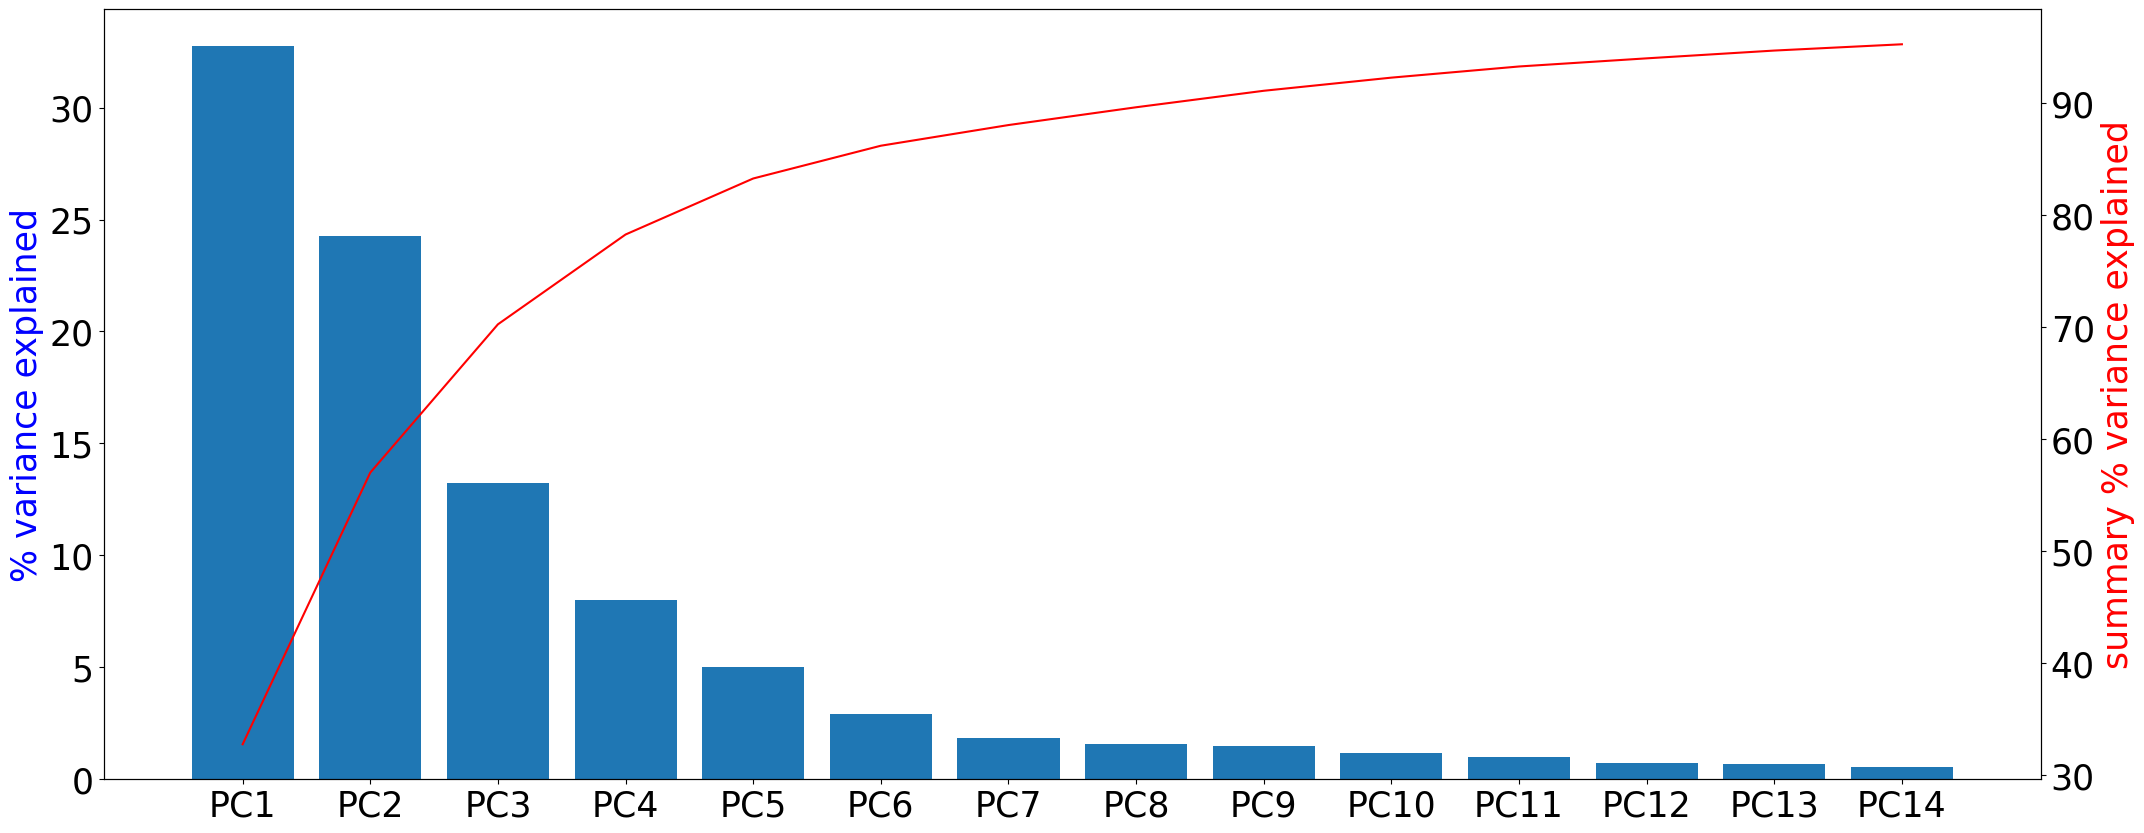

In [201]:
pcs = [f"PC{n}" for n in range(1, xx.shape[1]+1)]
fig, ax = plt.subplots(figsize=(25,10))
ax.bar(pcs, pca.explained_variance_ratio_*100)
ax2 = ax.twinx()
ax2.plot(pcs, (pca.explained_variance_ratio_*100).cumsum(), c="r")
ax.set_ylabel("% variance explained", color="b")
ax2.set_ylabel("summary % variance explained", color="r")

In [185]:
fig.savefig("scree_plot_fqd.pdf")

### 2D

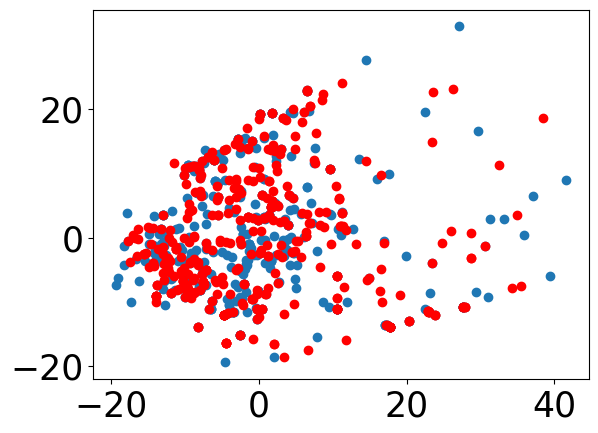

In [202]:
fig, ax = plt.subplots()
ax.scatter(pca_df["PC1"][yy==1], pca_df["PC2"][yy==1])
ax.scatter(pca_df["PC1"][yy==0], pca_df["PC2"][yy==0], c="r")

### 3D

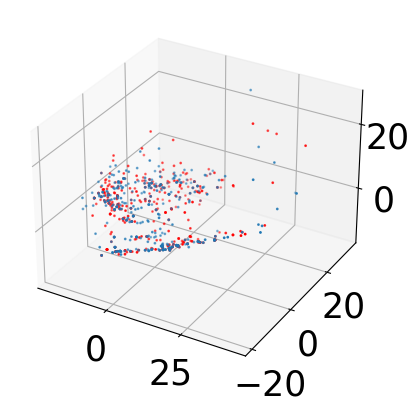

In [203]:
from mpl_toolkits.mplot3d import Axes3D
fig, ax = plt.subplots(subplot_kw={"projection":"3d"})
ax.scatter(pca_df["PC1"][yy==1], pca_df["PC2"][yy==1], pca_df["PC3"][yy==1], s=1)
ax.scatter(pca_df["PC1"][yy==0], pca_df["PC2"][yy==0], pca_df["PC3"][yy==0], c="r", s=1)

In [204]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,3.301145,18.597217,-5.699404,7.300771,-3.068009,-3.896532,-3.870439,0.909340,-0.032121,0.055126,2.849040,1.734469,3.298933,0.539144
1,-17.418838,-3.729869,-0.161246,2.495813,-1.220451,-2.972221,0.637023,2.292576,-1.285674,1.448527,-1.571840,0.480203,-1.368605,-0.186338
2,23.050517,-11.612594,3.593912,0.867255,-5.838128,0.261825,-0.577465,-0.132476,-1.034804,-0.889480,0.504457,0.451571,-0.631453,-1.009808
3,6.399043,0.309787,-8.705321,-6.138663,1.199078,4.232694,-1.201968,0.906276,-2.931570,-1.236345,-1.330748,-1.119965,0.213240,0.482570
4,3.333785,-18.535907,-1.862124,5.513450,-6.641124,0.902618,-0.087619,0.120712,-0.493651,1.709890,0.525538,-1.026081,2.177598,0.625767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,-9.383370,-3.927239,7.573920,1.525022,-1.013338,0.693454,-1.363682,-0.052042,1.148487,-0.095530,-1.243011,-0.149612,-0.200715,0.076711
818,-8.724795,11.167387,0.777470,0.860009,-4.622237,1.763553,3.461143,0.448984,1.150631,-2.018194,-0.913379,0.131517,-1.579748,-1.969542
819,3.449799,-2.849884,-9.301823,-4.625415,-0.371217,3.820994,0.050862,1.847267,-1.340670,-0.106665,-1.233350,0.372555,-0.058324,-0.678977
820,15.986464,9.116201,9.282931,4.434643,7.685569,3.907155,-0.220644,2.651799,-0.644347,-4.027709,-2.222251,1.123176,-2.788006,1.264660


In [205]:
yy

528    1
331    0
735    1
17     0
388    0
      ..
715    1
767    1
72     0
235    0
37     1
Name: class_encoded, Length: 822, dtype: int64

In [210]:
pd.concat([pca_df, yy], axis=1).to_csv("pca_df.csv")